<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/ATH(UT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/refs/heads/main/Lockdown%201/DATA/ATH_DATA.csv'
df = pd.read_csv(url)
print(df)

       DAY    COMEAN     COMIN     COMAX  CO2O     NOMEAN      NOMIN  \
0    1-Mar  0.522714  0.217188  0.944444   0.6  33.803571  14.458333   
1    2-Mar  0.392118  0.160764  0.564757   0.5  21.216667   9.541667   
2    3-Mar  0.415938  0.273611  0.590972   0.4  20.741667  12.833333   
3    4-Mar  0.615278  0.186806  0.969444   0.3  34.058333  12.916667   
4    5-Mar  0.699965  0.416840  0.962847   0.5  45.125000  17.291667   
..     ...       ...       ...       ...   ...        ...        ...   
87  27-May  0.343030  0.100000  0.582812   0.3  20.803571  11.041667   
88  28-May  0.300138  0.100000  0.478125   0.4  19.146429  12.333333   
89  29-May  0.352852  0.100000  0.642561   0.5  16.077381   7.750000   
90  30-May  0.336397  0.100000  0.486848   0.5  16.471939   7.333333   
91  31-May  0.420903  0.100000  0.643750   0.3  23.714286   9.250000   

        NOMAX  NO2O    NO2MEAN  ...     NO2MAX  NO22O     O3MEAN      O3MIN  \
0   60.666667    39  35.511905  ...  57.541667     31  2

## **$SO_{2}$**

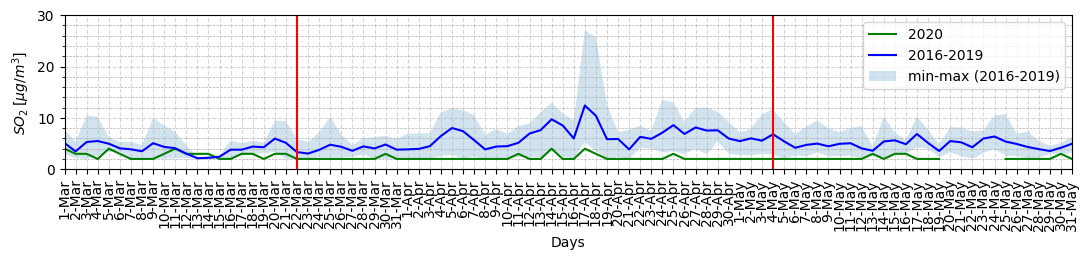

In [7]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$SO_{2} \: [μg/m^{3}$]')

x=[]
for i in df['SO22O']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['SO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['SO2MIN'], df['SO2MAX'], alpha=0.2, label='min-max (2016-2019)')
plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,30)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

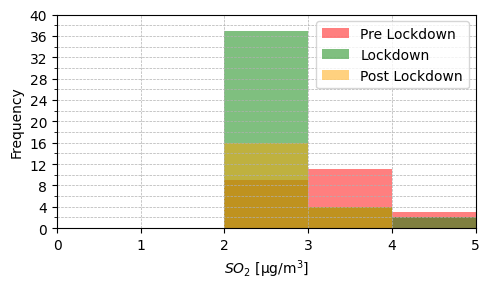

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure df is defined. Example: df = pd.read_csv('data.csv')

# Function to plot histogram and ensure zero bin is included
def plot_histogram(data, bins, label, color):
    filtered_data = data[data > 0]
    plt.hist(filtered_data, bins=bins, alpha=0.5, label=label, color=color)

# Plotting a histogram
plt.figure(figsize=(5, 3))

# Define bins
bins = np.arange(0, 6, 1)

# Plot histograms
plot_histogram(df['SO22O'][0:23], bins=bins, label='Pre Lockdown', color='red')
plot_histogram(df['SO22O'][23:66], bins=bins, label='Lockdown', color='green')
plot_histogram(df['SO22O'][66:91], bins=bins, label='Post Lockdown', color='orange')

# Labeling the plot
plt.xlabel('$SO_{2}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.xlim(0, 5)
plt.ylim(0, 40)
plt.legend()

# Customizing ticks
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 44, 4))

# Adding grid
plt.grid(linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(which='minor', linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()


In [9]:
mean_SO2MEAN = df['SO2MEAN'][23:66].dropna().mean()
mean_SO220 = df['SO22O'][23:66].dropna().mean()

if pd.notna(mean_SO2MEAN) and pd.notna(mean_SO220):
    percentage_change = ((mean_SO220 - mean_SO2MEAN) / mean_SO2MEAN) * 100
else:
    percentage_change = float('nan')

# Print the results
print(f"Mean of SO2MEAN (23-66): {mean_SO2MEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_SO220:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean of SO2MEAN (23-66): 6.09
Mean of 2020 (23-66): 2.19
Percentage Change: -64.12%


In [10]:
PRE  = df['SO22O'][0:23].dropna().mean()
LOCK = df['SO22O'][23:66].dropna().mean()
POST = df['SO22O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 2.74
LOCK: 2.19
POST: 1.76


In [11]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -20.19%
LOCK to POST: -19.49%


## **CO**

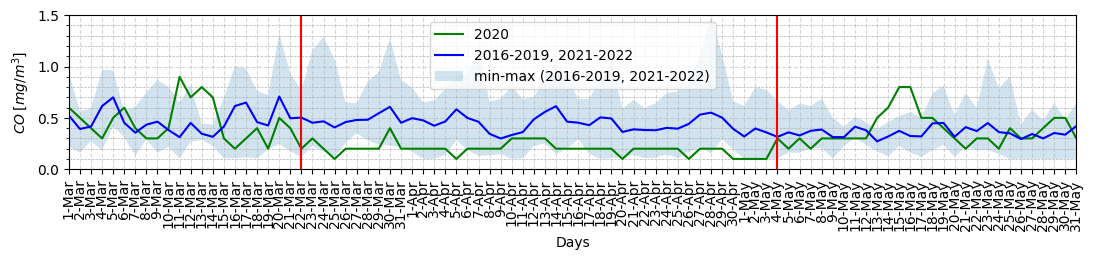

In [12]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$CO \: [mg/m^{3}$]')

plt.plot(df['DAY'], df['CO2O'], 'g', label='2020')
plt.plot(df['DAY'], df['COMEAN'], 'b', label='2016-2019, 2021-2022')
plt.fill_between(df['DAY'], df['COMIN'], df['COMAX'], alpha=0.2 ,label='min-max (2016-2019, 2021-2022)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,1.5)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

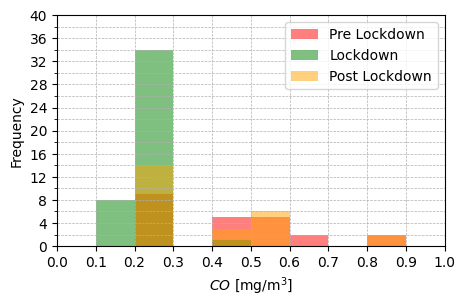

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))

bins = np.arange(0, 1, 0.1)

plt.hist(df['CO2O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['CO2O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['CO2O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$CO$ [mg/m$^{3}$]')
plt.ylabel('Frequency')
plt.xlim(0,1)
plt.ylim(0,40)
plt.legend()

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 44, 4))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(which='minor',linestyle='--', linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [14]:
mean_COMEAN = df['COMEAN'][23:66].dropna().mean()
mean_CO20 = df['CO2O'][23:66].dropna().mean()

if pd.notna(mean_COMEAN) and pd.notna(mean_CO20):
    percentage_change = ((mean_CO20 - mean_COMEAN) / mean_COMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_COMEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_CO20:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 0.44
Mean of 2020 (23-66): 0.20
Percentage Change: -55.57%


In [15]:
PRE  = df['CO2O'][0:23].dropna().mean()
LOCK = df['CO2O'][23:66].dropna().mean()
POST = df['CO2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 0.44
LOCK: 0.20
POST: 0.39


In [16]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -55.43%
LOCK to POST: 98.31%


## **NO**

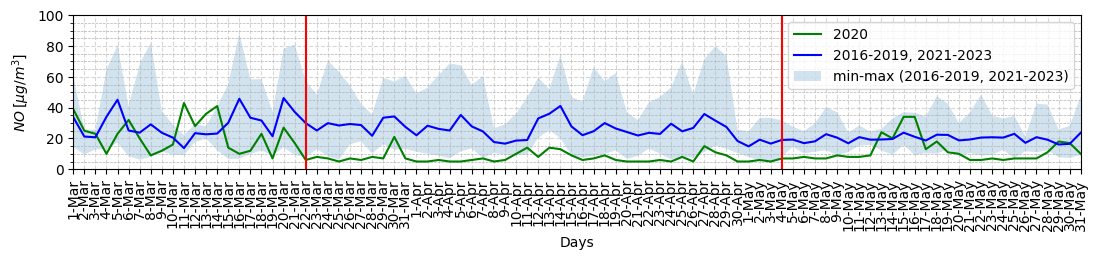

In [17]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['NO2O'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

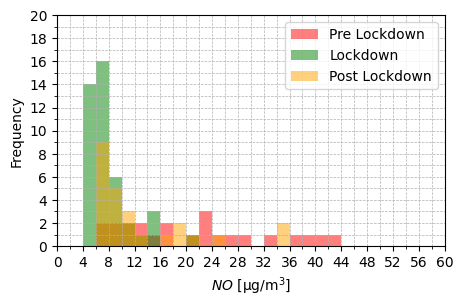

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 52, 2)

plt.hist(df['NO2O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO2O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO2O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,50)
plt.ylim(0,20)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 64, 4))
plt.yticks(np.arange(0, 22, 2))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [19]:
mean_NOMEAN = df['NOMEAN'][23:66].dropna().mean()
mean_NO20 = df['NO2O'][23:66].dropna().mean()

if pd.notna(mean_NOMEAN) and pd.notna(mean_NO20):
    percentage_change = ((mean_NO20 - mean_NOMEAN) / mean_NOMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NOMEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_NO20:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 25.84
Mean of 2020 (23-66): 7.51
Percentage Change: -70.92%


In [20]:
PRE  = df['NO2O'][0:23].dropna().mean()
LOCK = df['NO2O'][23:66].dropna().mean()
POST = df['NO2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 20.91
LOCK: 7.51
POST: 12.48


In [21]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -64.08%
LOCK to POST: 66.14%


## **$NO_{2}$**

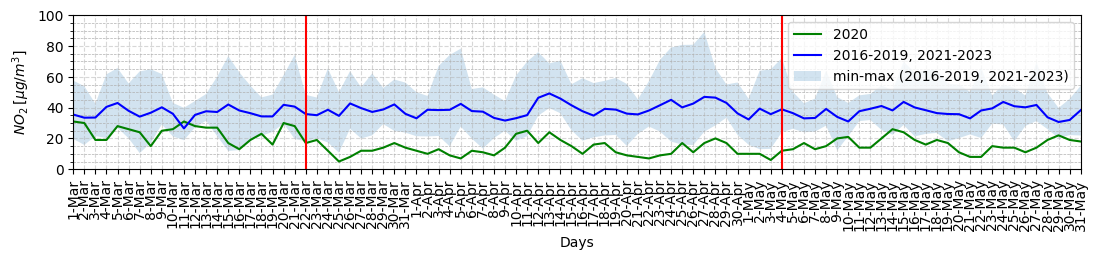

In [22]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['NO22O'], 'g', label='2020')
plt.plot(df['DAY'], df['NO2MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

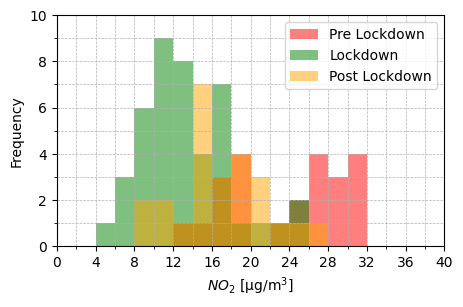

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting a histogram
plt.figure(figsize=(5,3))

bins = np.arange(0, 42,2)
# Plotting histograms
plt.hist(df['NO22O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO22O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO22O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO_{2}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,40)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 44, 4))
plt.yticks(np.arange(0, 12, 2))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [24]:
mean_NO2MEAN = df['NO2MEAN'][23:66].dropna().mean()
mean_NO220 = df['NO22O'][23:66].dropna().mean()

if pd.notna(mean_NO2MEAN) and pd.notna(mean_NO220):
    percentage_change = ((mean_NO220 - mean_NO2MEAN) / mean_NO2MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NO2MEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_NO220:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 39.01
Mean of 2020 (23-66): 12.88
Percentage Change: -66.97%


In [25]:
PRE  = df['NO22O'][0:23].dropna().mean()
LOCK = df['NO22O'][23:66].dropna().mean()
POST = df['NO22O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 23.39
LOCK: 12.88
POST: 16.40


In [26]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -44.92%
LOCK to POST: 27.29%


## **$O_{3}$**

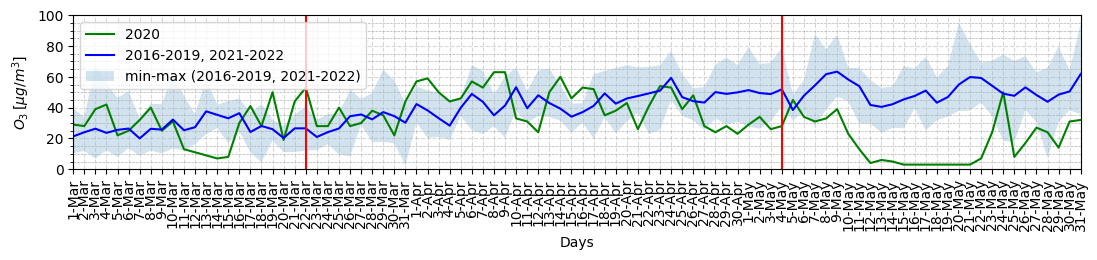

In [27]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$O_{3} \:  [μg/m^{3}$]')

x=[]
for i in df['O32O']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['O3MEAN'], 'b', label='2016-2019, 2021-2022')
plt.fill_between(df['DAY'], df['O3MIN'], df['O3MAX'], alpha=0.2,label='min-max (2016-2019, 2021-2022)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

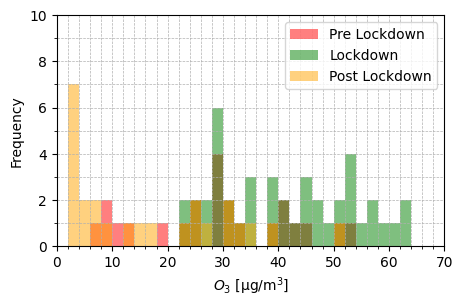

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 72, 2)

plt.hist(df['O32O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['O32O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['O32O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$O_{3}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,70)
plt.ylim(0,10)


plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 80, 10))
plt.yticks(np.arange(0, 12, 2))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [29]:
mean_O3MEAN = df['O3MEAN'][23:66].dropna().mean()
mean_O320 = df['O32O'][23:66].dropna().mean()

if pd.notna(mean_O3MEAN) and pd.notna(mean_O320):
    percentage_change = ((mean_O320 - mean_O3MEAN) / mean_O3MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_O3MEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_O320:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")


Mean (23-66): 42.07
Mean of 2020 (23-66): 40.65
Percentage Change: -3.37%


In [30]:
PRE  = df['O32O'][0:23].dropna().mean()
LOCK = df['O32O'][23:66].dropna().mean()
POST = df['O32O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 28.43
LOCK: 40.65
POST: 16.44


In [31]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: 42.96%
LOCK to POST: -59.56%
